# Part 1: Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #easy plotting: subpackage of seaborn

In [2]:
#the command below is only needed in Jupyter Notebooks. In google colab, just upload the dataset
Titanic=pd.read_csv("Titanic.csv")

## 1. Detecting and dealing with corrupt/invalid data

1. Use the header method `df.head()` to visualize the header of the dataset and `df.info()` to get information on the dataset. Answer the questions asked in class. 

In [3]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  893 non-null    int64  
 1   Survived     893 non-null    int64  
 2   Pclass       893 non-null    object 
 3   Name         893 non-null    object 
 4   Sex          893 non-null    object 
 5   Age          716 non-null    float64
 6   SibSp        893 non-null    int64  
 7   Parch        893 non-null    int64  
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    float64
 10  Cabin        205 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.8+ KB


2. Check that the numerical values taken on by the dataset make sense. Use `df.describe()` as explained in class. If something is off, try and investigate where this is coming from. Based on your investigations, what would you recommend?

In [5]:
Titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,893.000000,893.000000,716.000000,893.000000,893.000000,893.000000
mean,447.000000,0.382979,29.649679,0.521837,0.380739,32.076091
std,257.931192,0.486386,14.540967,1.101784,0.805355,49.725466
min,1.000000,0.000000,0.420000,0.000000,0.000000,-50.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,670.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,893.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Titanic[Titanic["Fare"]<0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,893,0,err,err,err,5.0,0,0,err,-50.0,err,err


In [7]:
Titanic=Titanic.drop(index=892)

In [8]:
Titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,446.500000,0.383408,29.684154,0.522422,0.381166,32.168105
std,257.642517,0.486489,14.521835,1.102264,0.805706,49.677238
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,38.000000,1.000000,0.000000,31.000000
max,892.000000,1.000000,80.000000,8.000000,6.000000,512.329200


3. Check that the values that are strings or objects make sense. Use `df["column"].unique()` as explained in class. Is there anything unusual?

In [9]:
Titanic["Pclass"].unique()

array(['third', 'first', 'second'], dtype=object)

In [10]:
Titanic["Name"].unique().shape

(891,)

In [11]:
Titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [12]:
Titanic["Ticket"].unique().shape

(681,)

In [13]:
Titanic["Cabin"].unique().shape
#some are missing: there are "nan"

(148,)

In [14]:
Titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

One can even investigate a bit more to work out why the ticket numbers are not unique: families tend to share ticket numbers.

In [15]:
Titanic["Ticket"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
887    False
888     True
889    False
890    False
891     True
Name: Ticket, Length: 892, dtype: bool

In [16]:
Titanic["Ticket"].loc[888]

'W./C. 6607'

In [17]:
Titanic[Titanic["Ticket"]=='W./C. 6607']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,third,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.45,NaN,S
888,889,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


4. *Optional: Detecting possible outliers using Boxplots and Z-scores for the "Age" and "Fare" columns of the Titanic dataset*

In [18]:
a=~Titanic["Age"].isna() #finds the locations where Age is *not* empty

{'whiskers': [<matplotlib.lines.Line2D at 0x21349f75580>,
 'caps': [<matplotlib.lines.Line2D at 0x21349f75be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21349f75130>],
 'medians': [<matplotlib.lines.Line2D at 0x2134a612340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2134a6126d0>],
 'means': []}

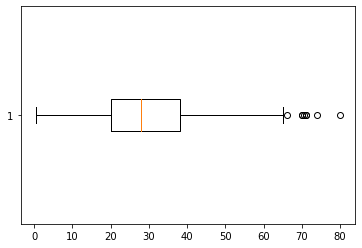

In [19]:
plt.boxplot(Titanic.loc[a,"Age"],vert=False) #filter based on the non-empty values, draw a horizontal boxplot

(array([ 54.,  46., 178., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

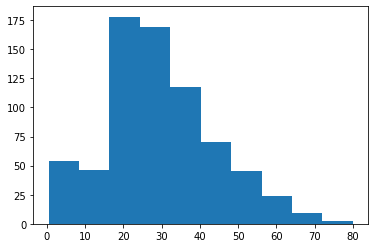

In [20]:
plt.hist(Titanic["Age"]) #the data is heavily skewed towards people in their 20s -> these were the working-class targets of the Titanic

{'whiskers': [<matplotlib.lines.Line2D at 0x2134a781ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2134a790640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2134a781b50>],
 'medians': [<matplotlib.lines.Line2D at 0x2134a790d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2134a79a160>],
 'means': []}

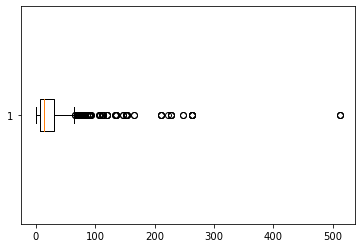

In [21]:
plt.boxplot(Titanic["Fare"],vert=False)

In [22]:
Titanic[Titanic["Fare"]==Titanic["Fare"].max()] #filter based on the highest value of Fare: doesn't seem like an outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,first,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,first,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,first,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


## 2. Features with no information

The column `PassengerId` is randomly allocated to each passenger and is unique to each passenger. It doesn't help explain, e.g., why a given passenger survived. As its value is useless, we drop it as done below. 

In [23]:
Titanic=Titanic.drop(columns=["PassengerId"])

In [24]:
Titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,1,first,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,first,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,0,third,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## 3. Duplicates

Check whether there are duplicates in the dataset. Which row would this be?

In [25]:
dups=Titanic.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE
Titanic[dups] #returns the problematic row

True


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,0,third,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S


We don't technically need to investigate this everytime: Python has a nice function which drops the duplicate rows automatically. Run it. What do you realize?

In [26]:
print(Titanic.shape) #gives current size of dataset
Titanic.drop_duplicates(inplace=True) # delete duplicate rows
print(Titanic.shape)

(892, 11)
(891, 11)


## 4. Scaling/Normalization

In [27]:
from sklearn import preprocessing

In [28]:
X = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

An example of normalizing (putting the data in the [0,1] range).

In [29]:
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

An example of scaling (making sure that the data has mean 0 and variance 1).

In [30]:
X_scaled = preprocessing.scale(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## 5. Data imputation 

First, we need to be able to detect whether values are missing. Then we need to be able to deal with them. 

1. Use the function `isna()` combined with `any()` and `sum()` to work out (i) which features have missing values; (2) how many missing values are there for each feature.

In [31]:
Titanic.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [32]:
Titanic.isna().sum()/891

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

We now work on dealing with the values. We import from sklearn the impute package. 

2. Drop the `Cabin` column as seen before

In [33]:
from sklearn import impute

In [34]:
Titanic.drop(columns=["Cabin"],inplace=True)

In [35]:
Titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,first,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,first,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


3. Let's deal with `Embarked` now that only contains two missing values. As seen in class, the majority of passengers embarked at Southampton. Use the code below to replace the missing values with "S", the most frequent value. Then use `isna().sum()` to check that the values have been replaced.

In [36]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
Titanic[["Embarked"]]=imp.fit_transform(Titanic[["Embarked"]])

In [37]:
Titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

4. For the Age column, we use a nearest neighbor approach. Use `KNNImputer` to fill in the missing values as done below. Check that there are no more missing values in the Age column.

In [38]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
Titanic[["Age"]]=imputer.fit_transform(Titanic[["Age"]])

In [39]:
Titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Part 2: Feature Engineering

## 1. Numerical to Categorical

1. We start with the one-hot encoding. We just do this for `Sex` and `Embarked`. This is very easy to do in Python: just run the code below.

`Name` and `Ticket` are too personal to use one-hot encoding: they aren't really categories. They could be used however to create meaningful categories (e.g., `Nobility` or `Married`). However, this requires natural language processing techniques that are above and beyond this course, and context about the problem which we do not have.

In [40]:
Titanic=pd.get_dummies(Titanic,columns=["Sex","Embarked"], drop_first=True)

In [41]:
Titanic

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,third,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1
1,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0
2,1,third,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1
4,0,third,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,second,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1
887,1,first,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1
888,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,1,first,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0


2. *(Homework)* We move onto the Ordinal Encoding: we create a new column called `Pclass_Num` where we replace first, second, and third by 1,2,3. We use `if...then...` and `for` loops to do this. Don't forget to drop the `Pclass` feature afterwards.

In [42]:
for i in range(0,891):
    if Titanic.loc[i,"Pclass"]=="first":
        Titanic.loc[i,"Pclass_num"]=1
    elif Titanic.loc[i,"Pclass"]=="second":
         Titanic.loc[i,"Pclass_num"]=2
    else:
        Titanic.loc[i,"Pclass_num"]=3

In [43]:
Titanic.drop(columns=["Pclass"],inplace=True)

In [44]:
Titanic

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_num
0,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,3.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,1.0
2,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,3.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,1.0
4,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,2.0
887,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1,1.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1,3.0
889,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0,1.0


## 2. Feature transforms & interactions

1. *(Homework)* Create a new column in the dataset called `Fare_euros_2021` that contains the fare paid to board the Titanic updated to Euros in 2021. You may want to use the following knowledge:
* A pound in 1912 is worth 118.36 pounds today.
* A pound today is worth 1.18 euros today.

This is what we call a Feature Transform. We could also do more complicated feature transforms, i.e., take the logarithm of a column. This would require importing `log` from the `numpy` package and then using the command `Titanic["Fare_log"]=Titanic["Fare"].apply(log)`.

In [45]:
Titanic["Fare_euros_2021"]=Titanic["Fare"]*1.18*118.36

In [46]:
Titanic

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_num,Fare_euros_2021
0,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,3.0,1012.569800
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,1.0,9955.767838
2,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,3.0,1106.843540
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,1.0,7416.200880
4,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,3.0,1124.301640
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,2.0,1815.642400
887,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1,1.0,4189.944000
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1,3.0,3275.139560
889,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0,1.0,4189.944000


2. *(Homework)* The division into Parch and SibSp is quite random. We want to regroup this column into one column called `Family_Presence`. Create a new column in the dataframe called `Family_Presence` which contains 1 if either SibSp is greater or equal to 1 or Parch is greater or equal to 1. Create this column then drop `Parch` and `SibSp`.

In [47]:
#one way of doing this
Titanic.loc[(Titanic["SibSp"]>=1) | (Titanic["Parch"]>=1),"Family Presence"]=1
Titanic.loc[(Titanic["SibSp"]==0) & (Titanic["Parch"]==0),"Family Presence"]=0

In [48]:
Titanic

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_num,Fare_euros_2021,Family Presence
0,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,1,3.0,1012.569800,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0,1.0,9955.767838,1.0
2,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,3.0,1106.843540,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,1.0,7416.200880,1.0
4,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,1,3.0,1124.301640,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,2.0,1815.642400,0.0
887,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,0,1,1.0,4189.944000,0.0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,1,3.0,3275.139560,1.0
889,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,0,0,1.0,4189.944000,0.0


In [50]:
#Alternative - you can also use a for loop and an if statement
Titanic["Family_Presence"]=np.where((Titanic["SibSp"]>=1) | (Titanic["Parch"]>=1), 1,0)

In [52]:
Titanic=Titanic.drop(columns=["SibSp","Parch"])
Titanic.head()

,Survived,Name,Age,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_num,Fare_euros_2021,Family Presence,Family_Presence
0,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,1,0,1,3.0,1012.569800,1.0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,1.0,9955.767838,1.0,1
2,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,0,0,1,3.0,1106.843540,0.0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,1,1.0,7416.200880,1.0,1
4,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,3.0,1124.301640,0.0,0


# Homework Exercises Solutions

## Exercise 3:

1. For scaling we proceed similarly, we subtract the mean $\mu$ of the feature vector from $x_i$ and divide by its standard deviation $\sigma$. In this way, each feature has now become $\frac{x_i-\mu}{\sigma}$. 
So, the average of this new feature vector is:
$$\frac{\frac{x_1-\mu}{\sigma}+\ldots+\frac{x_n-\mu}{\sigma}}{n}=\frac{x_1+\ldots+x_n-n \cdot \mu}{n \sigma}=\frac{1}{\sigma}\cdot \left( \frac{x_1+\ldots+x_n}{n} -\mu\right)=\frac{1}{\sigma}\cdot \left( \mu -\mu\right)=0.$$

Recall that the variance of numbers $y_1,\ldots,y_n$ is $$\frac{(y_1-\bar{y})^2+\ldots+(y_n-\bar{y})^2}{n}$$ where $\bar{y}$ is the average or mean of the numbers $y_1,\ldots,y_n$.
Here, we have just shown that the mean of the new feature vector is 0. Hence its variance is given by:
$$\frac{(\frac{x_1-\mu}{\sigma})^2+\ldots+(\frac{x_n-\mu}{\sigma})^2}{n}=\frac{1}{\sigma^2} \cdot \frac{(x_1-\mu)^2+\ldots+(x_n-\mu)^2}{n}=\frac{1}{\sigma^2} var(x_1,...,x_n)=\frac{1}{\sigma^2} \cdot \sigma^2=1.$$
As the standard deviation is the square root of the variance, it follows that the new feature vector has standard deviation one.

3. We use the np.array above. 

In [53]:
X = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

In [54]:
(X[:,0]-X[:,0].mean())/(X[:,0].std())
#we get the same thing as when we use the preprocessing library of sklearn

array([ 0.        ,  1.22474487, -1.22474487])

## Exercise 4: Sarah's diamonds

In [3]:
#Comment out if you are using Google Colab
Sarah_raw_data = pd.read_csv("Sarah_dataset_2021.csv")

We proceed similarly to how we did to the `Titanic` dataset.

1. Take a look at the header and info about the dataset. What is its size? Do you understand each feature?

In [5]:
Sarah_raw_data.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0


In [6]:
Sarah_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   Carat Weight  6000 non-null   float64
 2   Cut           6000 non-null   object 
 3   Color         6000 non-null   object 
 4   Clarity       6000 non-null   object 
 5   Polish        6000 non-null   object 
 6   Symmetry      6000 non-null   object 
 7   Report        6000 non-null   object 
 8   Price         6000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 422.0+ KB


2. Check the values taken by each feature, is there anything abnormal to report? Are there duplicates? Are there missing values?

In [7]:
Sarah_raw_data.describe()

,ID,Carat Weight,Price
count,6000.000000,6000.000000,6000.000000
mean,3000.500000,1.334520,11791.579333
std,1732.195139,0.475696,10184.350051
min,1.000000,0.750000,2184.000000
25%,1500.750000,1.000000,5150.500000
50%,3000.500000,1.130000,7857.000000
75%,4500.250000,1.590000,15036.500000
max,6000.000000,2.910000,101561.000000


In [8]:
Sarah_raw_data["Cut"].unique()

array(['Ideal', 'Very Good', 'Fair', 'Good', 'Signature-Ideal'],
      dtype=object)

In [9]:
Sarah_raw_data["Color"].unique()

array(['H', 'E', 'G', 'D', 'F', 'I'], dtype=object)

In [10]:
Sarah_raw_data["Clarity"].unique()

array(['SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'IF', 'FL'], dtype=object)

In [11]:
Sarah_raw_data["Polish"].unique()

array(['VG', 'ID', 'EX', 'G'], dtype=object)

In [12]:
Sarah_raw_data["Symmetry"].unique()

array(['EX', 'ID', 'VG', 'G'], dtype=object)

In [13]:
Sarah_raw_data["Report"].unique()

array(['GIA', 'AGSL'], dtype=object)

<AxesSubplot:>

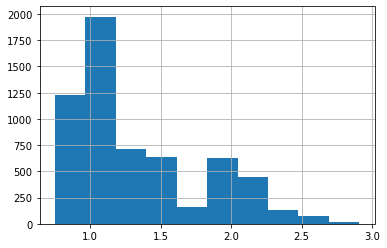

In [14]:
Sarah_raw_data["Carat Weight"].hist()

In [15]:
Sarah_raw_data.duplicated().any()

False

In [16]:
Sarah_raw_data.isna().any()

ID              False
Carat Weight    False
Cut             False
Color           False
Clarity         False
Polish          False
Symmetry        False
Report          False
Price           False
dtype: bool

In [17]:
Sarah_raw_data.isna().sum()

ID              0
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Nothing abnormal to report: there are no duplicates, no missing values and no corrupt values.

We further drop the `ID` column which brings us nothing and one-hot encode the dataset to make it numerical.

In [18]:
Sarah_raw_data.drop(columns=["ID"],inplace=True)

In [20]:
Sarah_raw_data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250.0
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328.0
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157.0
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206.0


In [22]:
Sarah_data = pd.get_dummies(data=Sarah_raw_data, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True) 

In [23]:
Sarah_data

,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,5169.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0.83,3470.0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0.85,3183.0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.91,4370.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0.83,3171.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,6250.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,1.00,5328.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5997,1.02,6157.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,1.27,11206.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
